In [3]:
#Downloading the Corpus

import nltk
nltk.download('punkt')
nltk.download('gutenberg')
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
import re
import keras
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

austen = gutenberg.sents('austen-sense.txt') + gutenberg.sents('austen-emma.txt') + gutenberg.sents('austen-persuasion.txt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [4]:
#Sanity check,This training corpus contains 16498 sentences.

print(len(austen))
print(austen[0:15])

16498
[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'], ['CHAPTER', '1'], ['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.'], ['Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their', 'property', ',', 'where', ',', 'for', 'many', 'generations', ',', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', '.'], ['The', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', ',', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', ',', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', ',', 'had', 'a', 'constant', 'companion', 'and', 'housekeeper', 'in', 'his', 'sister', '.'], ['But', 'her', 'death', ',', 'which', 'happened', 'ten', 'years', 'before', 'his', 'own', ',', 'produced', 'a', 'great', 'alte

In [5]:
#Preprocessing the Training Corpus, preprocessing function

nltk.download('stopwords')
def preprocessing(text):

    #remove punctuation
    pattern = '[0-9]'
    tokens = [re.sub(r"[^a-zA-Z0-9]", '', t) for t in text]
    tokens = [re.sub(pattern, '', t) for t in tokens]
    
    # lowercasing
    tokens = [t.lower() for t in tokens]
    #print(tokens)

    # stopword removal- benefits are it removes rare words
    stop = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop]
    #print(tokens)

    #remove empty spaces
    while("" in tokens) : 
        tokens.remove("") 
    
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#normalize the text/corpus

normalized=[]
for line in range(len(austen)):
    #print(austen[line],line)
    normalized.append(preprocessing(austen[line]))


In [7]:
#include only the sentances>3

normalized_corpus=[]

for line in range(len(normalized)):
    count=0
    for n in normalized[line]:
        count=count+1
    if count>2:
        normalized_corpus.append(normalized[line])
#take out sent<3 

print('Length of processed corpus:', len(normalized_corpus))
print('Processed line:', normalized_corpus[10])


Length of processed corpus: 13927
Processed line: ['therefore', 'succession', 'norland', 'estate', 'really', 'important', 'sisters', 'fortune', 'independent', 'might', 'arise', 'father', 'inheriting', 'property', 'could', 'small']


In [0]:
#Creating the Corpus Vocabulary and Preparing the Dataset.

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(normalized_corpus)

word2idx = tokenizer.word_index
#word2idx['PAD'] = 0

idx2word = {v:k for k, v in word2idx.items()}

sents_as_ids=[]

for line in range(len(normalized_corpus)):
    wids=[]
    for a in normalized_corpus[line]:
        for w in text.text_to_word_sequence(a):
            wids.append(word2idx[w])
            #print(wids)
    sents_as_ids.append(wids)
        #print(sa)

vocab_size = len(word2idx)+1
embed_size = 100

In [9]:
print('Number of unique words:', len(idx2word))

Number of unique words: 10098


In [10]:
print('Vocabulary Sample:', list(idx2word.items())[:10])

Vocabulary Sample: [(1, 'could'), (2, 'would'), (3, 'mr'), (4, 'mrs'), (5, 'must'), (6, 'said'), (7, 'one'), (8, 'much'), (9, 'miss'), (10, 'every')]


In [11]:
print('\nSample word2idx: ', list(word2idx.items())[:10])


Sample word2idx:  [('could', 1), ('would', 2), ('mr', 3), ('mrs', 4), ('must', 5), ('said', 6), ('one', 7), ('much', 8), ('miss', 9), ('every', 10)]


In [12]:
print('\nAbove sentence as a list of ids:' , sents_as_ids[:3])


Above sentence as a list of ids: [[305, 1379, 75, 4299], [108, 101, 57, 333, 2588], [1022, 405, 1627, 597, 554, 2784, 1023, 66, 4300, 512, 768, 160, 1164, 199, 15, 190, 3044, 147]]


In [13]:
#Generating training instances

from keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(sent, vocabulary_size=vocab_size, window_size=5) for sent in
sents_as_ids]

pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(len(pairs)):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
# the first word and its index
    idx2word[pairs[i][0]], pairs[i][0],
# the second word and its index
    idx2word[pairs[i][1]], pairs[i][1],
# the label
    labels[i]))


(sensibility (1379), struggle (1894)) -> 0
(austen (4299), sensibility (1379)) -> 1
(sensibility (1379), austen (4299)) -> 1
(jane (75), clearly (3059)) -> 0
(jane (75), contraction (5543)) -> 0
(sense (305), austen (4299)) -> 1
(sense (305), sensibility (1379)) -> 1
(austen (4299), disapproves (6687)) -> 0
(sense (305), jane (75)) -> 1
(sensibility (1379), armed (9484)) -> 0
(jane (75), austen (4299)) -> 1
(sensibility (1379), jane (75)) -> 1
(austen (4299), pleasanter (2873)) -> 0
(sense (305), approaching (2132)) -> 0
(jane (75), standard (4143)) -> 0
(sensibility (1379), prosing (7847)) -> 0
(sense (305), imprisonment (9670)) -> 0
(jane (75), sense (305)) -> 1
(jane (75), sensibility (1379)) -> 1
(sensibility (1379), sense (305)) -> 1
(austen (4299), sense (305)) -> 1
(austen (4299), frequenting (9616)) -> 0
(sense (305), toilsome (9988)) -> 0
(austen (4299), jane (75)) -> 1


In [14]:
#. Building the Skip-gram Neural Network Architecture

from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import plot_model

target_word = Input((1,), dtype='int32')

target_embedding = Embedding(vocab_size, embed_size, name='target_embed_layer',embeddings_initializer='glorot_uniform',input_length=1)(target_word)

target_input = Reshape((embed_size, ))(target_embedding)


context_word = Input((1,), dtype='int32')

context_embedding = Embedding(vocab_size, embed_size, name='context_embed_layer',embeddings_initializer='glorot_uniform',input_length=1)(context_word)

context_input = Reshape((embed_size, ))(context_embedding)


merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])

#similarity = merge([target_input, context_input], mode='cos', dot_axes=0)

label = Dense(1, activation='sigmoid')(merged_inputs)

model = Model(inputs=[target_word, context_word], outputs=[label]) # label is the output of step D



model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
target_embed_layer (Embedding)  (None, 1, 100)       1009900     input_1[0][0]                    
__________________________________________________________________________________________________
context_embed_layer (Embedding) (None, 1, 100)       1009900     input_2[0][0]                    
____________________________________________________________________________________________

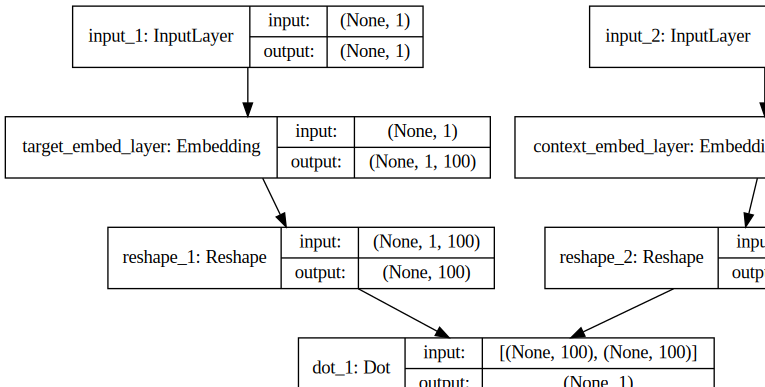

In [16]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

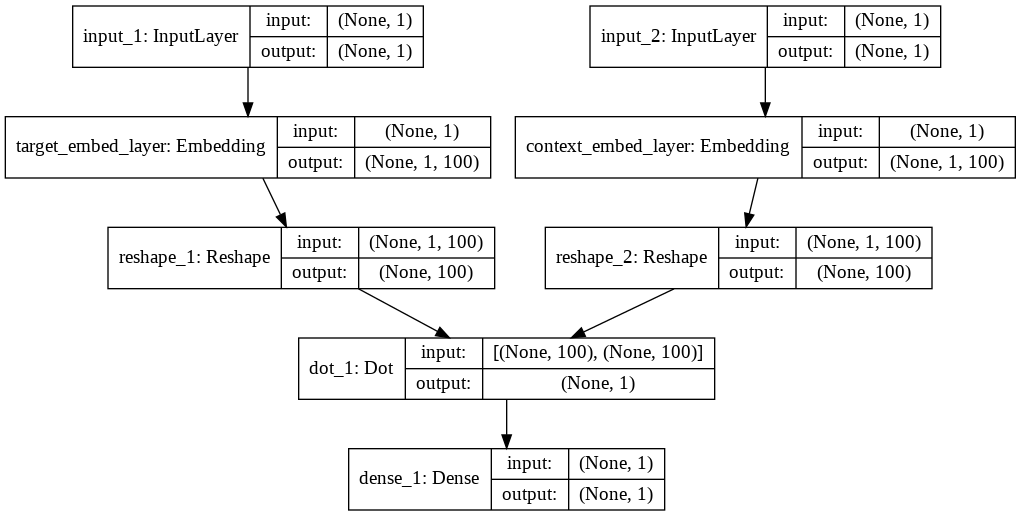

In [17]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
#Training the Model

import numpy as np

for epoch in range(1, 6):
    epoch_loss = 0
    # in each epoch, train all the sentences, one per iteration=> batch_size = num_sents
    for i, sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]], dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]], dtype='int32')
        labels = np.array(sent_examples[1], dtype='int32')
        X = [target_wds, context_wds]
        Y = labels
        if i % 5000 == 0: # after 5000 sentences i.e. 5000 iterations
            print('Processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X, Y)
    print('Processed all %d sentences' %i)
    print('Epoch:', epoch, 'Loss:', epoch_loss, '\n')

Processed 0 sentences








Processed 5000 sentences


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-bf170ec71e8b>", line 15, in <module>
    epoch_loss += model.train_on_batch(X, Y)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1449, in train_on_batch
    outputs = self.train_function(ins)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2979, in __call__
    return self._call(inputs)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2937, in _call
    fetched = self._callable_fn(*array_vals)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py", line 1472, in __call__
    run_metadata_ptr)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/u

KeyboardInterrupt: ignored

In [0]:
#Getting the Word Embeddings

word_embeddings = model.get_layer('target_embed_layer').get_weights()[0][1:] # Recall that 0 was left for padding
print(word_embeddings.shape)
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

In [0]:
#Measuring Similarity Between Word Pairs

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(word_embeddings)
print(similarity_matrix.shape)

In [0]:
#Exploring and Visualizing your Word Embeddings using t-SNE

search_items = ['man', 'love', 'hatred', 'woman', 'wisdom', 'kindness', 'god', 'man', 'folly', 'fool']
similar_words = {term: [idx2word[idx]for idx in (-1 * similarity_matrix[word2idx[term]-1]).argsort()[1:6] + 1]for term in search_items}
print(similar_words)


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',va='bottom')